In [1]:
# import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
import plotly.plotly as py

In [42]:
init_notebook_mode(True)

In [43]:
pd.set_option('display.max_columns', None)

In [44]:
df = pd.read_csv('dataset/2016 School Explorer.csv')
shsat = pd.read_csv('dataset/D5 SHSAT Registrations and Testers.csv')
safety = pd.read_csv('dataset/2010-2016-school-safety-report.csv')

In [45]:
print("Head of the data(3):")
print(df.head(3))

Adjusted Grade New? Other Location Code in LCGMS                School Name  \
0            NaN  NaN                          NaN  P.S. 015 ROBERTO CLEMENTE   
1            NaN  NaN                          NaN        P.S. 019 ASHER LEVY   
2            NaN  NaN                          NaN       P.S. 020 ANNA SILVER   

       SED Code Location Code  District   Latitude  Longitude  \
0  310100010015        01M015         1  40.721834 -73.978766   
1  310100010019        01M019         1  40.729892 -73.984231   
2  310100010020        01M020         1  40.721274 -73.986315   

                    Address (Full)      City    Zip                Grades  \
0  333 E 4TH ST NEW YORK, NY 10009  NEW YORK  10009  PK,0K,01,02,03,04,05   
1   185 1ST AVE NEW YORK, NY 10003  NEW YORK  10003  PK,0K,01,02,03,04,05   
2  166 ESSEX ST NEW YORK, NY 10002  NEW YORK  10002  PK,0K,01,02,03,04,05   

  Grade Low Grade High Community School?  Economic Need Index  \
0        PK         05               Yes                0.919   
1        PK         05                No                0.641   
2        PK         05                No                0.744   

  School Income Estimate Percent ELL Percent Asian Percent Black  \
0            $31,141.72           9%            5%           32%   
1            $56,462.88           5%           10%           20%   
2            $44,342.61          15%           35%            8%   

  Percent Hispanic Percent Black / Hispanic Percent White  \
0              60%                      92%            1%   
1              63%                      83%            6%   
2              49%                      57%            4%   

  Student Attendance Rate Percent of Students Chronically Absent  \
0                     94%                                    18%   
1                     92%                                    30%   
2                     94%                                    20%   

  Rigorous Instruction % Rigorous Instruction Rating Collaborative Teachers %  \
0                    89%              Meeting Target                      94%   
1                    96%                         NaN                      96%   
2                    87%              Meeting Target                      77%   

  Collaborative Teachers Rating Supportive Environment %  \
0                Meeting Target                      86%   
1                           NaN                      97%   
2                Meeting Target                      82%   

  Supportive Environment Rating Effective School Leadership %  \
0              Exceeding Target                           91%   
1                           NaN                           90%   
2            Approaching Target                           61%   

  Effective School Leadership Rating Strong Family-Community Ties %  \
0                   Exceeding Target                            85%   
1                   Exceeding Target                            86%   
2                 Not Meeting Target                            80%   

  Strong Family-Community Ties Rating Trust %        Trust Rating  \
0                      Meeting Target     94%    Exceeding Target   
1                      Meeting Target     94%      Meeting Target   
2                  Approaching Target     79%  Not Meeting Target   

  Student Achievement Rating  Average ELA Proficiency  \
0         Approaching Target                     2.14   
1           Exceeding Target                     2.63   
2         Approaching Target                     2.39   

   Average Math Proficiency  Grade 3 ELA - All Students Tested  \
0                      2.17                                 20   
1                      2.98                                 33   
2                      2.54                                 76   

   Grade 3 ELA 4s - All Students  \
0                              0   
1                              2   
2                              6   

   Grade 3 ELA 4s - America

In [46]:
print(sorted(list(df.columns)))

['Address (Full)',
 'Adjusted Grade',
 'Average ELA Proficiency',
 'Average Math Proficiency',
 'City',
 'Collaborative Teachers %',
 'Collaborative Teachers Rating',
 'Community School?',
 'District',
 'Economic Need Index',
 'Effective School Leadership %',
 'Effective School Leadership Rating',
 'Grade 3 ELA - All Students Tested',
 'Grade 3 ELA 4s - All Students',
 'Grade 3 ELA 4s - American Indian or Alaska Native',
 'Grade 3 ELA 4s - Asian or Pacific Islander',
 'Grade 3 ELA 4s - Black or African American',
 'Grade 3 ELA 4s - Economically Disadvantaged',
 'Grade 3 ELA 4s - Hispanic or Latino',
 'Grade 3 ELA 4s - Limited English Proficient',
 'Grade 3 ELA 4s - Multiracial',
 'Grade 3 ELA 4s - White',
 'Grade 3 Math - All Students tested',
 'Grade 3 Math 4s - All Students',
 'Grade 3 Math 4s - American Indian or Alaska Native',
 'Grade 3 Math 4s - Asian or Pacific Islander',
 'Grade 3 Math 4s - Black or African American',
 'Grade 3 Math 4s - Economically Disadvantaged',
 'Grade 3 M

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Columns: 161 entries, Adjusted Grade to Grade 8 Math 4s - Economically Disadvantaged
dtypes: float64(5), int64(123), object(33)
memory usage: 1.6+ MB


In [48]:
#df['Percent of Students Chronically Absent'] = df['Percent of Students Chronically Absent'].astype(str).apply(p2f)

In [49]:
#df['Rigorous Instruction %'] = df['Rigorous Instruction %'].astype(str).apply(p2f)

In [50]:
# preprocess data

def p2f(x):
    """ function to convert the percentage to a fraction."""
    return float(x.strip('%'))/100

In [51]:
def apply_multiple_columns(dataframe, col_names, function):
    """ function to apply function to all col_names in the dataframe"""
    for name in col_names:
        dataframe[name] = dataframe[name].astype(str).apply(function)
    return dataframe

In [52]:
col_names = ['Percent of Students Chronically Absent', 'Rigorous Instruction %', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %','Trust %', 'Student Attendance Rate']

In [53]:
df = apply_multiple_columns(df, col_names, p2f)

In [56]:
df['School Income Estimate'] = df['School Income Estimate'].str.replace(',','')
df['School Income Estimate'] = df['School Income Estimate'].str.replace('$','')
df['School Income Estimate'] = df['School Income Estimate'].str.replace(' ','')
df['School Income Estimate'] = df['School Income Estimate'].astype(float)

In [57]:
df['School Income Estimate'] = df['School Income Estimate'].fillna(0)
df['Economic Need Index'] = df['Economic Need Index'].fillna(0)

In [59]:
data_eco = [
    {
        'x': df['Longitude'],
        'y': df['Latitude'],
        'text': df['School Name'],
        'mode': 'markers',
        'marker': {
            'color': df['Economic Need Index'],
            'size': df['School Income Estimate']/4500,
            'showscale': True,
            'colorscale': 'Portland'
        }
    }
]

In [60]:
layout = go.Layout(
    title='New York School Population (Economic Need Index)',
    xaxis=dict(title='Longitude'),
    yaxis=dict(title='Latitude'))

In [63]:
fig = go.Figure(data=data_eco, layout=layout)
iplot(fig, filename='scatter_hover_labels_eco_index')

In [62]:
col_names_1 = ['Percent Asian', 'Percent Black', 'Percent Hispanic', 'Percent White', 'Percent Black / Hispanic']

In [23]:
df = apply_multiple_columns(df, col_names_1, p2f)

In [24]:
data_black = [
    {
        'x': df['Longitude'],
        'y': df['Latitude'],
        'text': df['School Name'],
        'mode': 'markers',
        'marker': {
            'color': df['Percent Black'],
            'size': df['School Income Estimate']/4500,
            'showscale': True,
            'colorscale': 'Portland'
        }
    }
]

layout = go.Layout( title='New York Black Student Ratio of School',
                  xaxis=dict(title='Longitude'),
                  yaxis=dict(title='Latitude'))
fig = go.Figure(data=data_black, layout=layout)
iplot(fig, filename='scatter_hover_labels_black_ratio')

In [25]:
data_his = [
    {
        'x': df['Longitude'],
        'y': df['Latitude'],
        'text': df['School Name'],
        'mode': 'markers',
        'marker': {
            'color': df['Percent Hispanic'],
            'size': df['School Income Estimate']/4500,
            'showscale': True,
            'colorscale': 'Portland'
        }
        
    }
]

layout = go.Layout(
    title='New York Hispanic Student Ratio of School',
    xaxis=dict(title='Longitude'),
    yaxis=dict(title='Latitude'))

fig = go.Figure(data=data_his, layout=layout)
iplot(fig, filename='scatter_hover_labels_hispanic_ratio')


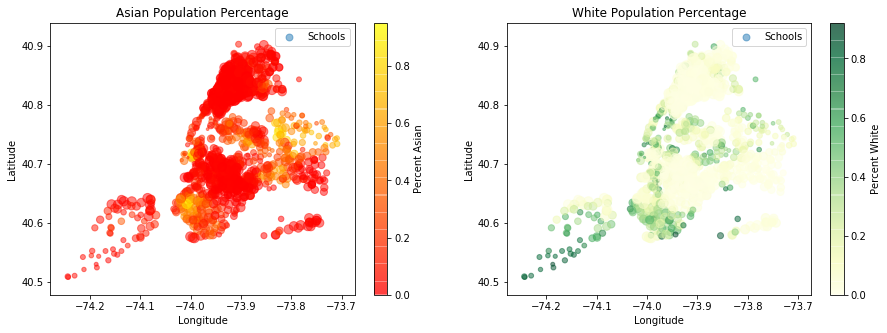

In [26]:
# set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

df.plot(kind='scatter', x='Longitude', y='Latitude', ax=axes[0],
       s=df['Economic Need Index']*100, c='Percent Asian', label='Schools',
       title='Asian Population Percentage', colorbar=True, alpha=0.5,
       figsize=(15,5), colormap='autumn')
df.plot(kind='scatter', x='Longitude', y='Latitude', ax=axes[1],
       s=df['Economic Need Index']*100, c='Percent White', label='Schools',
       title='White Population Percentage', colorbar=True, alpha=0.5,
       figsize=(15,5), colormap='YlGn')
plt.legend()
plt.show()

Text(0,0.5,'Employee Count')

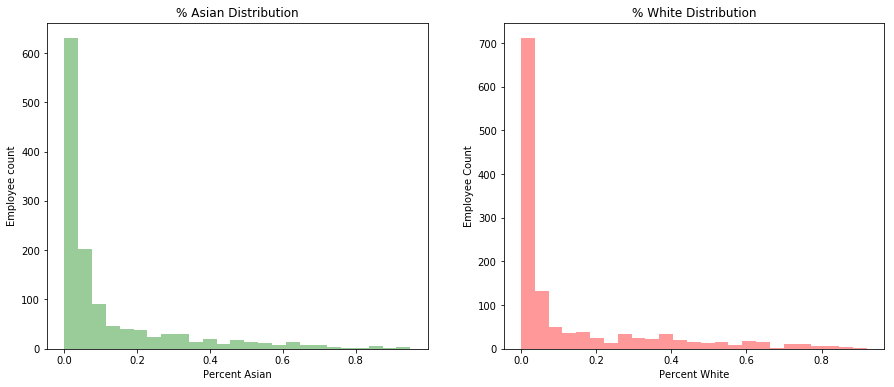

In [27]:
# White and Asian Distribution

# setting up matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df['Percent Asian'], kde=False, color='g',
             ax=axes[0], bins=25).set_title('% Asian Distribution')
axes[0].set_ylabel('Employee count')

# Graph Employee Evalutation
sns.distplot(df['Percent White'], kde=False, color='r',
             ax=axes[1], bins=25).set_title('% White Distribution')
axes[1].set_ylabel('Employee Count')

Text(0,0.5,'Employee Count')

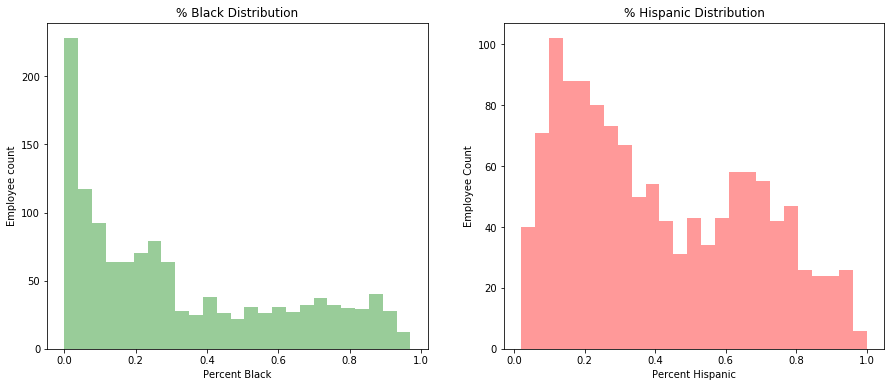

In [28]:
# Black and Hispanic Distribution

# setting up matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df['Percent Black'], kde=False, color='g',
             ax=axes[0], bins=25).set_title('% Black Distribution')
axes[0].set_ylabel('Employee count')

# Graph Employee Evalutation
sns.distplot(df['Percent Hispanic'], kde=False, color='r',
             ax=axes[1], bins=25).set_title('% Hispanic Distribution')
axes[1].set_ylabel('Employee Count')

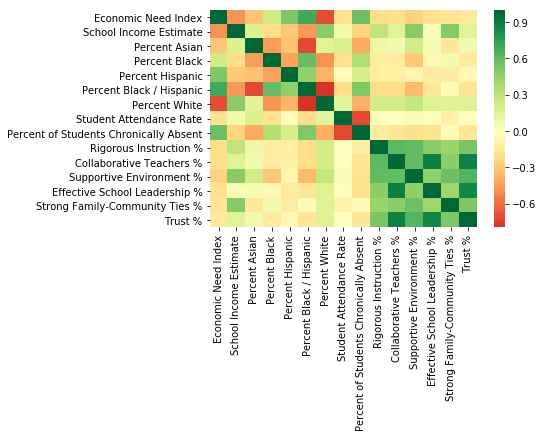

In [29]:
df2 = df.iloc[:, [16,17,19,20,21,22,23,24,25,26,28,30,32,34,36]]

# Correlation Matrix
corr = df2.corr()
corr = (corr)
sns.heatmap(corr, xticklabels=corr.columns.values,
                  yticklabels=corr.columns.values,
                  cmap='RdYlGn', center=0)

C:\Users\shashwat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'Economic Need Index (Black)')

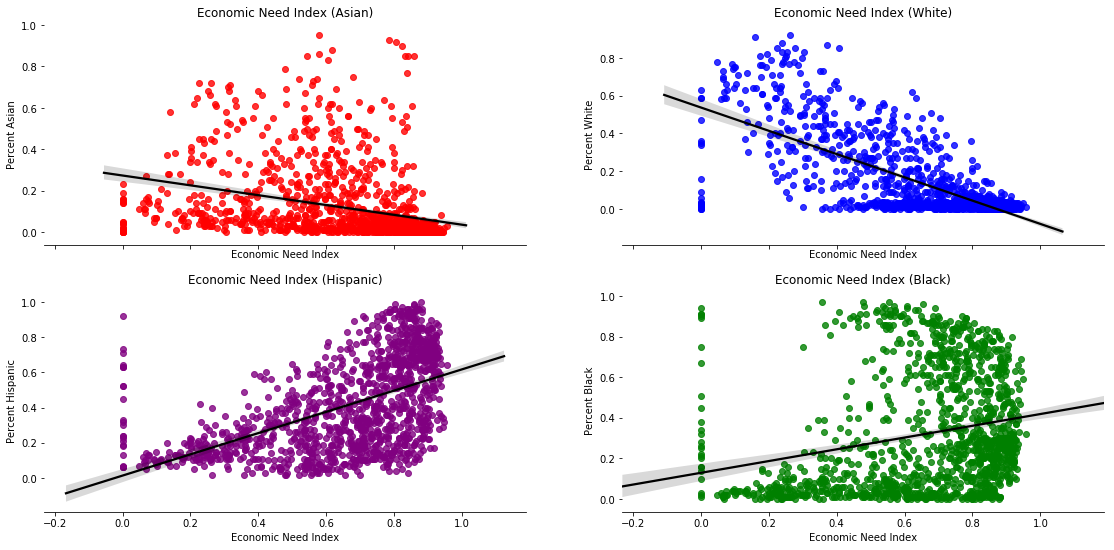

In [30]:
f, axes = plt.subplots(2, 2, figsize=(19,9), sharex=True)
sns.despine(left=True)

sns.regplot(x=df['Economic Need Index'], y=df['Percent Asian'],
           color='red', ax=axes[0,0], line_kws={'color':'black'})
sns.regplot(x=df['Economic Need Index'], y=df['Percent White'],
           color='blue', ax=axes[0,1], line_kws={'color':'black'})
sns.regplot(x=df['Economic Need Index'], y=df['Percent Hispanic'],
           color='purple', ax=axes[1,0], line_kws={'color':'black'})
sns.regplot(x=df['Economic Need Index'], y=df['Percent Black'],
           color='g', ax=axes[1,1], line_kws={'color':'black'})

axes[0,0].set_title('Economic Need Index (Asian)')
axes[0,1].set_title('Economic Need Index (White)')
axes[1,0].set_title('Economic Need Index (Hispanic)')
axes[1,1].set_title('Economic Need Index (Black)')

In [34]:
# dataframe of schools with an absent rate of 30% or more
absent_30 = df[df['Percent of Students Chronically Absent']>=.30]

# dataframe of schools with an absent rate of 11% or less
absent_11 = df[df['Percent of Students Chronically Absent']<=.11]

# exploring school absent rate
df['Percent of Students Chronically Absent'].describe()

count    1247.000000
mean        0.215750
std         0.140716
min         0.000000
25%         0.110000
50%         0.200000
75%         0.300000
max         1.000000
Name: Percent of Students Chronically Absent, dtype: float64

In [64]:
print("Description of Students with Absent Rate >=30%")
print(absent_30.iloc[:, [15, 16, 17, 23, 19, 20, 21, 22]].describe())

       Economic Need Index  School Income Estimate  Percent White  \
count           330.000000              330.000000     330.000000   
mean              0.840624            24213.924788       0.025455   
std               0.080521            17646.702137       0.040520   
min               0.369000                0.000000       0.000000   
25%               0.807500                0.000000       0.010000   
50%               0.857500            27338.415000       0.020000   
75%               0.898750            35521.105000       0.030000   
max               0.957000            79244.110000       0.460000   

       Percent Asian  Percent Black  Percent Hispanic  \
count     330.000000     330.000000        330.000000   
mean        0.027212       0.455091          0.477121   
std         0.039312       0.225843          0.228938   
min         0.000000       0.010000          0.020000   
25%         0.010000       0.260000          0.270000   
50%         0.010000       0.440000 

In [66]:
print("Description of Students with Absent Rate <11%")
print(absent_11.iloc[:, [15, 16, 17, 23, 19, 20, 21, 22]].describe())

Description of Students with Absent Rate <11%
       Economic Need Index  School Income Estimate  Percent White  \
count           326.000000              326.000000     326.000000   
mean              0.484862            44751.846319       0.254632   
std               0.226285            36657.241653       0.249776   
min               0.049000                0.000000       0.000000   
25%               0.295250                0.000000       0.020000   
50%               0.488500            46699.660000       0.180000   
75%               0.682000            69124.027500       0.437500   
max               0.878000           181382.060000       0.910000   

       Percent Asian  Percent Black  Percent Hispanic  \
count     326.000000     326.000000        326.000000   
mean        0.238436       0.187239          0.293374   
std         0.246289       0.272421          0.245842   
min         0.000000       0.000000          0.020000   
25%         0.040000       0.020000          0.

In [67]:
data = [
    {
        'x': absent_30['Longitude'],
        'y': absent_30['Latitude'],
        'text': absent_30['School Name'],
        'mode': 'markers',
        'marker': {
            'color': df['Economic Need Index'],
            'size': df['School Income Estimate']/4500,
            'showscale': True,
            'colorscale': 'Portland'
        }
    }
]

layout = go.Layout(
    title= 'Schools with >=30% Absent Rate',
    xaxis=dict(title='Longitude'),
    yaxis=dict(title='Latitude')
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels_absent_30')

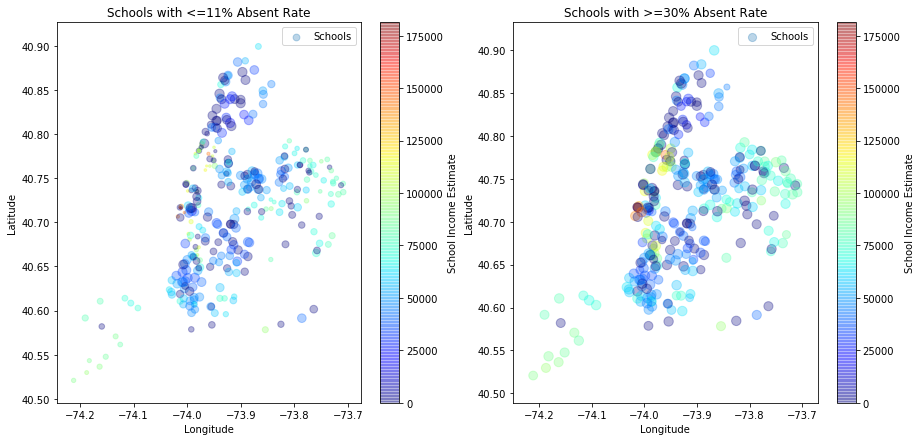

In [72]:
f, axes = plt.subplots(ncols=2, figsize=(15, 6))
absent_11.plot(kind="scatter", x="Longitude", y="Latitude",
               ax=axes[0], s=absent_11['Economic Need Index']*100,
               c='School Income Estimate', cmap=plt.get_cmap("jet"),
              label="Schools", title="Schools with <=11% Absent Rate",
              colorbar=True, alpha=0.3, figsize=(15, 7))

absent_11.plot(kind="scatter", x="Longitude", y="Latitude",
               ax=axes[1], s=absent_30['Economic Need Index']*100,
               c='School Income Estimate', cmap=plt.get_cmap("jet"),
              label="Schools", title="Schools with >=30% Absent Rate",
              colorbar=True, alpha=0.3, figsize=(15, 7))

plt.show()